In [22]:
import math as mt

In [23]:
import numpy as np

<h2>Importing text file and converting into suitable data format</h2>

In [1]:
file=open('ex2data1.txt','r')
data=file.read()

In [3]:
data=data.split('\n')

In [10]:
data=data[:len(data)-1]

In [14]:
data=[whole.split(',') for whole in data]

In [19]:
data=[[float(subpart) for subpart in part] for part in data]

In [24]:
data=np.array(data)

In [44]:
# Adding a column of ones in front
data=np.hstack((np.ones((data.shape[0],1)),data))

In [46]:
# differentiating X and Y from mixed data
X=data[:,0:3]
y=data[:,3]

In [77]:
y=y.reshape(len(X),1)

<h2>Visualizing the data</h2>

In [49]:
import matplotlib.pyplot as plt

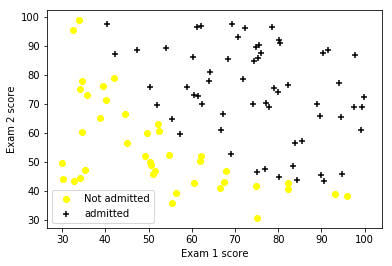

In [64]:
plt.scatter(X[y==0,[1]],X[y==0,[2]],color='yellow',marker='o',label='Not admitted')
plt.scatter(X[y==1,[1]],X[y==1,[2]],color='black',marker='+',label='admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='best')
plt.show()

<h2>Defining sigmoid function</h2>

In [95]:
# x=Dot product of X and theta
def sigmoid(x):
    return 1/(1+np.exp(-j))

In [ ]:
test=np.array([[1,2,3],[2,,2]])

<h2>Defining cost function</h2>

In [110]:
def costFunction(initial_theta,X,y):
    m=len(X)
    cost=sum(-1*(y*(np.log(sigmoid(np.dot(X,initial_theta))))+(1-y)*(np.log(1-(sigmoid(np.dot(X,initial_theta)))))))*(1/m)
    return cost

In [93]:
initial_theta=np.zeros((X.shape[1],1))

In [111]:
cost=costFunction(initial_theta,X,y)

In [113]:
print(cost)

[0.69314718]


<h2>Defining gradient function</h2>

In [168]:
def gradientFunction(X,y,theta,max_iter,alpha):
    J_history=[]
    m=len(X)
    theta_temp=np.zeros((X.shape[1],1))
    for j in range(max_iter):
        for i in range(X.shape[1]):
            theta_temp[i]=theta[i]-((alpha)*sum((sigmoid(np.dot(X,theta))-y)*X[:,i].reshape(len(X),1))*(1/m))
        theta=theta_temp.copy()
        J_history.append(costFunction(theta,X,y))
    return theta,J_history
            
            
    

In [182]:
theta,J_history=gradientFunction(X,y,initial_theta,1500,0.001)

In [183]:
theta

array([[-0.10400148],
       [ 0.01114724],
       [ 0.00125993]])

In [184]:
sigmoid(np.dot(np.array([[1,45,85]]),theta))

array([[0.6235674]])

<h2>Defining regularized cost function</h2>

In [215]:
def costFunctionRegular(initial_theta,X,y,lambbda):
    m=len(X)
    cost=sum((y*(np.log(sigmoid(np.dot(X,initial_theta))))+(1-y)*(np.log(1-(sigmoid(np.dot(X,initial_theta)))))))*(-1/m)+((lambbda/(2*m))*sum(theta**2))
    return cost

In [216]:
#Play with values of lambbda and see the change in cost function
costFunctionRegular(initial_theta,X,y,1)

array([0.69342968])

<h2>Defining regularized gradient function</h2>

In [223]:
def gradientFunctionRegular(X,y,theta,max_iter,alpha,lambbda):
    J_history=[]
    m=len(X)
    theta_temp=np.zeros((X.shape[1],1))
    for j in range(max_iter):
        for i in range(X.shape[1]):
            if(i==0):
                theta_temp[0]=theta[0]-((alpha)*sum((sigmoid(np.dot(X,theta))-y)*X[:,0].reshape(len(X),1))*(1/m))
            else:
                theta_temp[i]=theta[i]-(alpha)*((sum((sigmoid(np.dot(X,theta))-y)*X[:,i].reshape(len(X),1))*(1/m))+((lambbda/m)*theta[i]))
        theta=theta_temp.copy()
        J_history.append(costFunctionRegular(theta,X,y,lambbda))
    return theta,J_history

In [231]:
theta,J_history=gradientFunctionRegular(X,y,initial_theta,1500,0.001,1)

In [232]:
J_history

[array([0.69831541]),
 array([0.65973831]),
 array([0.66165379]),
 array([0.64888819]),
 array([0.64972267]),
 array([0.64313647]),
 array([0.6434917]),
 array([0.63955173]),
 array([0.63966975]),
 array([0.63712219]),
 array([0.63711824]),
 array([0.63539019]),
 array([0.6353245]),
 array([0.63411388]),
 array([0.6340196]),
 array([0.63315163]),
 array([0.6330474]),
 array([0.63241417]),
 array([0.63231041]),
 array([0.63184209]),
 array([0.63174441]),
 array([0.63139418]),
 array([0.63130532]),
 array([0.63104093]),
 array([0.63096189]),
 array([0.63076067]),
 array([0.63069146]),
 array([0.63053716]),
 array([0.63047724]),
 array([0.63035808]),
 array([0.6303066]),
 array([0.63021395]),
 array([0.63016995]),
 array([0.6300974]),
 array([0.63005992]),
 array([0.6300027]),
 array([0.62997081]),
 array([0.62992533]),
 array([0.62989818]),
 array([0.62986172]),
 array([0.62983856]),
 array([0.62980906]),
 array([0.62978923]),
 array([0.62976512]),
 array([0.62974804]),
 array([0.6297281

In [233]:
theta

array([[-0.10400026],
       [ 0.01114656],
       [ 0.0012605 ]])

In [234]:
#predicting
sigmoid(np.dot(np.array([[1,45,85]]),theta))

array([[0.62357208]])

<h2>Multiple Class Classification</h2>

In [259]:
multi_theta=np.zeros((len(set(list(y[:,0]))),X.shape[1]))

In [258]:
def gradientFunctionRegular(X,y,theta,max_iter,alpha,lambbda,c):
    m=len(X)
    theta_temp=np.zeros((X.shape[1],1))
    for j in range(max_iter):
        for i in range(X.shape[1]):
            if(i==0):
                theta_temp[0]=theta[0]-((alpha)*sum((sigmoid(np.dot(X,theta))-y)*X[:,0].reshape(len(X),1))*(1/m))
            else:
                theta_temp[i]=theta[i]-(alpha)*((sum((sigmoid(np.dot(X,theta))-y)*X[:,i].reshape(len(X),1))*(1/m))+((lambbda/m)*theta[i]))
        theta=theta_temp.copy()
    multi_theta[c,:]=theta

In [256]:
# finding parameters

In [ ]:
for c in set(y):
    gradientFunctionRegular(X,(y==c)*1,theta,max_iter,alpha,lambbda,c)